## Regression Dive

I'd like to be as thorough in my understanding as possible, so this my be slow but it will be very rigorous.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
%matplotlib inline

I was having trouble understanding the notation for linear regression. It turns out I was mixing up the concept of training the model vice using the model equation to make the prediction.

We see a typical linear regression model displayed as follows:

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

**This is the formula used to make the prediction. I was confusing the model formula with the training formula, which different.**

Each $x_n$ represents a feature of the data, for example, a feature of the housing data would be median income or bedrooms per household or proximity to water, etc. Each $\theta_n$ represents a weight that was trained using the training data to generate our linear regression model. He covers the normal equation in the next section. Each feature will have its own $\theta$ that was generated for that feature. 

We then put this into a "simpler" form:

$\hat{y} = \theta^{T}\cdot\textbf{x}$

This is a vectorized form of the equation before it. $\hat{y}$ still represents the prediction. $\theta$ is a column vector consisting of each feature's weight. **x** is a column vector of each feature. In order to get the same expression as the function above, we perform a dot product between $\theta$ and **x**. **In order to perform a dot product between these two vectors, we have to transpose one of them; thus, we transpose $\theta$.** (The first vector must have the same number of columns as the second vector's number of rows.)

We would then get the same expression as above. See! Not too hard! (Took me a while to figure that out since I'm still building my familiarity with vector notation.)

Aurelien covers the normal equation that outputs a $\theta$ that reduces the cost function. **I'll take this as a lookup to see how exactly this equation does this.**

$\hat{\theta} = (\textbf{X}^{T}\cdot\textbf{X})^{-1}\cdot\textbf{X}^{T}\cdot\textbf{y}$

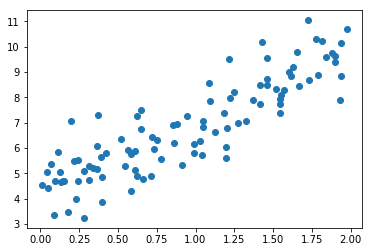

In [14]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'o')

In [15]:
X_b = np.c_[np.ones((100, 1)), X] # add 1 to each instance

From my understanding through searches on the internet, this column of ones is required in order to deduce the y-intercept or the _bias_ of the data set.

In [16]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # expect different numbers than the book b

array([[ 4.21509616],
       [ 2.77011339]])

Aurelien mentions $\theta_0 = 3.865$ and $\theta_1 = 3.139$. I don't know what he's referring to here.

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

[0, 2, 0, 15]

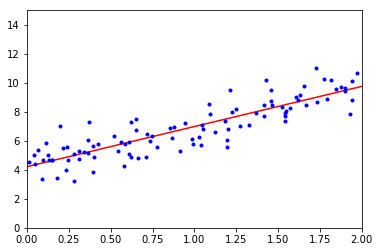

In [19]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

To clarify what we did here, we simply added two new data points at the extremes of our plot in order to draw the 